<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_ED01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion diferencial, empleando el metodo de Euler. Deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}


# Actividad 02, Oscilador armónico
2. Resolver la siguiente ecuación difirencial, empleando el metodo de Euler. interprete su resultado.

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


Para el oscilador aromónico anterior, escribir un programa con extension py que permita dar escribir la velocidad y la posicion
como funcion del tiempo.

La ejecucion del programa deberá ser de la siguiente forma:

python oscilador_armonico.py

al ejecutarse, el programa almacenará en memoría en el directorio data, la velocidad y la posición.

    data/velocidad.txt
    data/posicion.txt

Puede utlizar el siguiente código como guía:

```python
#!/usr/bin/env python3
def euler(x):
    
    return y, v

def save_file(path):
    return


if __name__=='__main__':
    y, v = euler(x)
    save_file(path)

```


# **Decaimiento Radiactivo**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

**metodo de Euler**

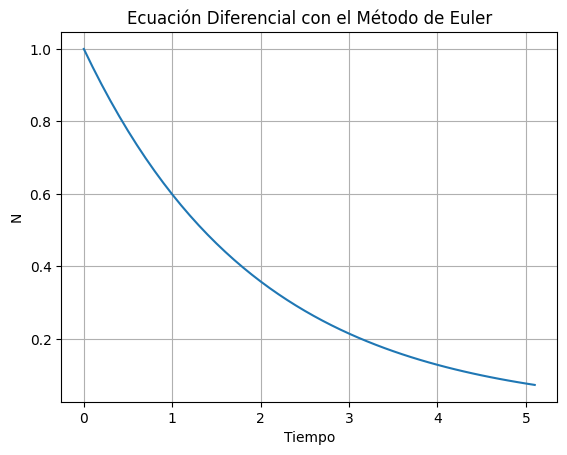

In [25]:
def ecuacion_diferencial(N, t, lambda_):
    return -lambda_ * N


def euler_method(ecuacion, N0, t0, t_final, delta_t, lambda_):

    resultados_N = [N0]
    resultados_t = [t0]


    while t0 < t_final:
        N0 = N0 + delta_t * ecuacion(N0, t0, lambda_)
        t0 = t0 + delta_t


        resultados_N.append(N0)
        resultados_t.append(t0)

    return resultados_t, resultados_N


N0 = 1.0
t0 = 0.0
t_final = 5.0
delta_t = 0.1
lambda_ = 0.5


t, N = euler_method(ecuacion_diferencial, N0, t0, t_final, delta_t, lambda_)


plt.plot(t, N)
plt.xlabel('Tiempo')
plt.ylabel('N')
plt.title('Ecuación Diferencial con el Método de Euler')
plt.grid()
plt.show()


**metodo de Runge Kutta**

In [26]:
def funrunge(t,y,*params):
  lamda = params[0]
  f = -lamda*y
  return f
def rk4(funrunge,t,y,h,*params):
  for i in range(0,len(t)-1):
    k1 = funrunge(t[i],y[i], *params)
    k2 = funrunge(t[i]+h/2 , y[i] + h/2*k1,*params)
    k3 = funrunge(t[i]+h/2 , y[i] + h/2*k2,*params)
    k4 = funrunge(t[i]+h/2 , y[i] + h/2*k3,*params)

    y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 +k4)

  return y

def cond_inicial(to,tf,h,yini):

  N = int((tf-to)/h)
  t = np.linspace(to,tf,N)
  y = np.zeros(len(t))
  t[0]= to
  y[0] = yini

  return t,y

In [27]:
lamda = 0.5
t ,y = cond_inicial(0,5,0.01,100)
params = (lamda,)
y = rk4(funrunge ,t ,y,0.01,*params)
sol_teorica = y[0]*np.exp(-lamda*t)


Text(0, 0.5, 'N')

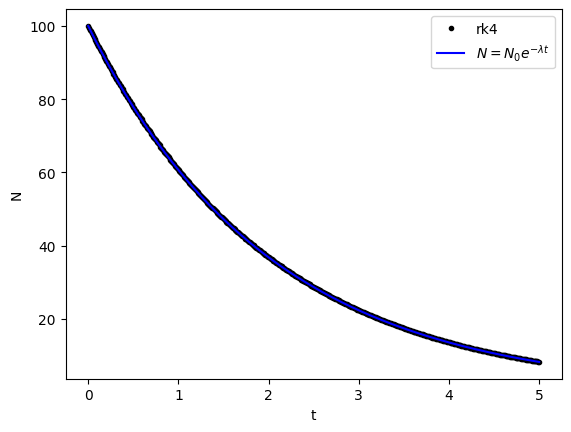

In [28]:
fig , ax = plt.subplots(nrows=1 , ncols=1)
ax.plot(t,y,"k." , label = "rk4")
ax.plot(t,sol_teorica,"b-" , label = "$N = N_0e^{-\lambda t} $")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("N")

# **Oscilador Armonico**

**Metodo de Euler**

In [29]:
# funcion de euler para el oscilador armonico
def fun(t,y,params):
  gamma = params[0]
  omega = params[1]

  dydt = y[1]

  dvdt = -gamma*y[1] - omega*y[0]
  return np.array([dydt , dvdt])

In [30]:
gamma = 0.5
omega = 20
params = (gamma,omega)

y0 = 2
v0 = 1E-12
y_ci = np.array([y0,v0])
t = np.linspace(0,100,1000)
h = t[1] - t[0]
N = len(t)
y = np.zeros(N)
v = np.zeros(N)
y[0] = y_ci[0]
v[0] = y_ci[1]


for i in range(0,N-1):
  y[i+1] = y[i] + h*fun(t,y_ci,params)[0]
  v[i+1] = v[i] + h*fun(t,y_ci,params)[1]
  y_ci = np.array([y[i+1],v[i+1]])


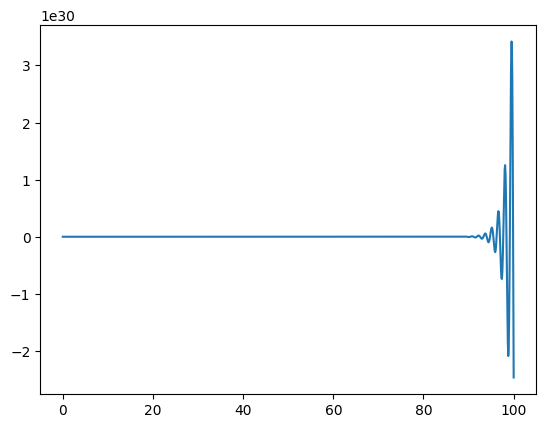

In [31]:

plt.plot(t,y)

In [32]:
# Euler para el oscilador armonico
def euler(t,y0,v0,params):
  h = t[1] - t[0]
  N = len(t)
  y = np.zeros(N)
  v = np.zeros(N)
  y_ci = np.array([y0,v0])
  y[0] = y_ci[0]
  v[0] = y_ci[1]
  for i in range(0,N-1):
    y[i+1] = y[i] + h*fun(t,y_ci,params)[0]
    v[i+1] = v[i] + h*fun(t,y_ci,params)[1]
    y_ci = np.array([y[i+1],v[i+1]])

  plt.plot(t,y,color="red")
  plt.grid()
  plt.title("Oscilador Armonico")
  return



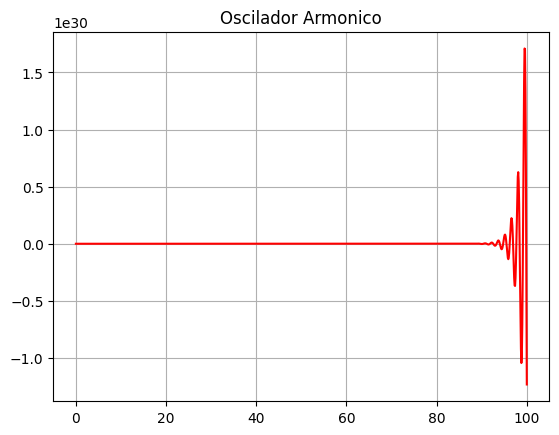

In [33]:
t = np.linspace(0,100,1000)
euler = euler(t,1,1E-12,params)

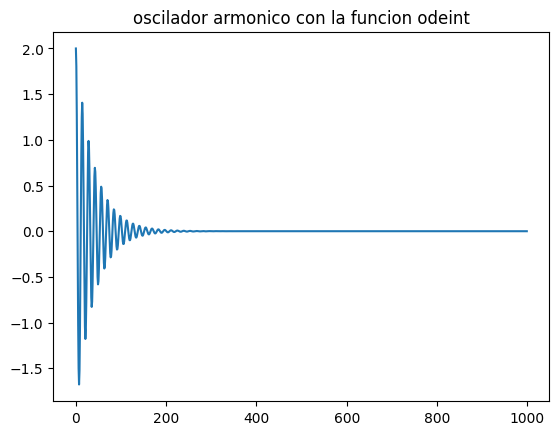

In [34]:
# Metodo odeint
from scipy.integrate import odeint

def fun(y,t,gamma,omega):

  dydt = y[1]

  dvdt = -gamma*y[1] - omega*y[0]
  return np.array([dydt , dvdt])

y_ci = np.array([2,1E-10])
t = np.linspace(0,100,1000)
sol = odeint(fun,y_ci,t,args=(gamma,omega))
plt.plot(sol[:,0])
plt.title("oscilador armonico con la funcion odeint")
plt.show()

**Metodo Runge Kutta**

\begin{equation}
\frac{\mathrm{d}y^2}{\mathrm{d}^2t} + ω^2y + b\frac{\mathrm{d}y}{\mathrm{d}t} = 0
\end{equation}

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = v
\end{equation}

\begin{equation}
\frac{\mathrm{d}v}{\mathrm{d}t} = ω^2y -bv
\end{equation}

In [35]:
#Funcion para hallar el dy/dt
def fun1(t, y, v):
    dydt = v
    return dydt
# Funcion para hallar el dv/dt
def fun2(t, y, v, omega, b):
    dvdt = -omega**2 * y - b * v
    return dvdt

def runge_kutta(y, v, t, h, omega, b):
    y_ = np.zeros(len(t))
    v_ = np.zeros(len(t))
    y_[0] = y
    v_[0] = v

    for i in range(0, len(t) - 1):
      # creacion de los pesos k1,k2,k3,k4 y l1,l2,l3,l4
        k1 = h * fun1(t[i], y_[i], v_[i])
        l1 = h * fun2(t[i], y_[i], v_[i], omega, b)

        k2 = h * fun1(t[i] + h/2, y_[i] + k1/2, v_[i] + l1/2)
        l2 = h * fun2(t[i] + h/2, y_[i] + k1/2, v_[i] + l1/2, omega, b)

        k3 = h * fun1(t[i] + h/2, y_[i] + k2/2, v_[i] + l2/2)
        l3 = h * fun2(t[i] + h/2, y_[i] + k2/2, v_[i] + l2/2, omega, b)

        k4 = h * fun1(t[i] + h, y_[i] + k3, v_[i] + l3)
        l4 = h * fun2(t[i] + h, y_[i] + k3, v_[i] + l3, omega, b)

        y_[i + 1] = y_[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        v_[i + 1] = v_[i] + (l1 + 2*l2 + 2*l3 + l4) / 6

    return y_, v_

def cond_inicial(to, tf, h, yini):
    N = int((tf - to) / h)
    t = np.linspace(to, tf, N)
    y = np.zeros(len(t))
    t[0] = to
    y[0] = yini

    return t, y


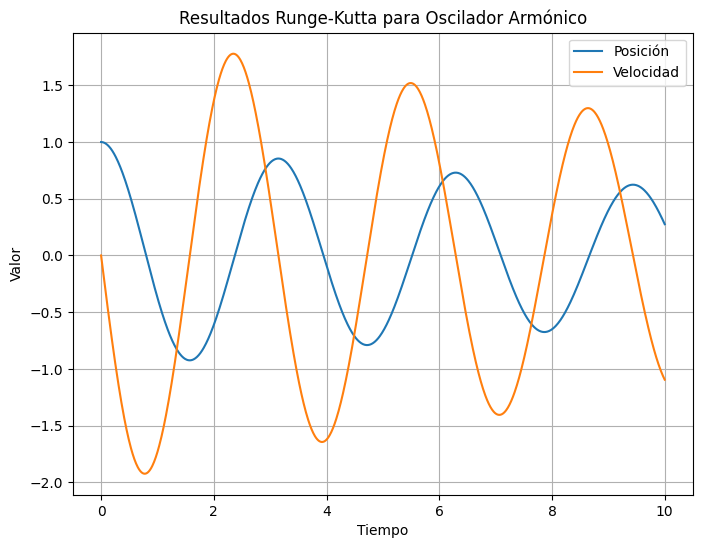

In [36]:
# Definición de condiciones iniciales
to = 0
tf = 10
h = 0.01
yini = 1.0
vini = 0.0
omega = 2.0
b = 0.1

# Generar condiciones iniciales
t, y = cond_inicial(to, tf, h, yini)

# Llamada a la función runge_kutta
y_, v_ = runge_kutta(yini, vini, t, h, omega, b)

# Graficar resultados
plt.figure(figsize=(8, 6))
plt.plot(t, y_, label='Posición')
plt.plot(t, v_, label='Velocidad')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Resultados Runge-Kutta para Oscilador Armónico')
plt.legend()
plt.grid(True)
plt.show()
